# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1067.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           1.66e-42
Time:                        10:09:39   Log-Likelihood:                 3.5515
No. Observations:                  50   AIC:                            0.8971
Df Residuals:                      46   BIC:                             8.545
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9138      0.080     61.354      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.3725346   4.85943903  5.30793826  5.69196594  5.99486291  6.2121143
  6.35209126  6.43467565  6.48799348  6.54379389  6.63223285  6.77691866
  6.9910331   7.27516576  7.61721717  7.99438667  8.37691853  8.7329907
  9.03394313  9.25898648  9.3986178   9.4561818   9.44732134  9.39740734
  9.33737045  9.29861916  9.30787956  9.38280424  9.52907208  9.73945517
  9.99500639 10.26817233 10.52732027 10.74193531 10.88763389 10.95016998
 10.9277756  10.83145134 10.68315899 10.51221324 10.35046541 10.22707035
 10.16369637 10.17096521 10.2467069  10.37631632 10.53515273 10.69258821
 10.81703972 10.88115812]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.85114795 10.69358116 10.42721446 10.09479202  9.75258021  9.45659161
  9.24887121  9.14720231  9.14075254  9.19272603]


## Plot comparison

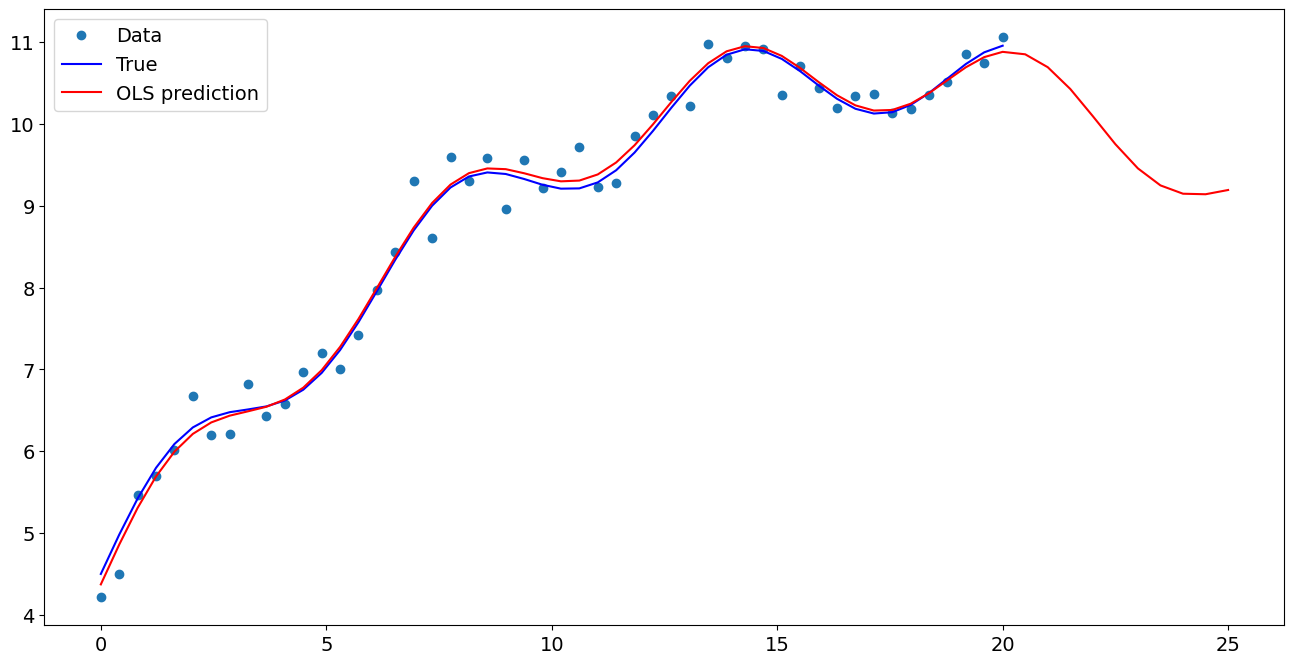

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.913829
x1                  0.520116
np.sin(x1)          0.478290
I((x1 - 5) ** 2)   -0.021652
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.851148
1    10.693581
2    10.427214
3    10.094792
4     9.752580
5     9.456592
6     9.248871
7     9.147202
8     9.140753
9     9.192726
dtype: float64